In [1]:
import sys
sys.path.insert(0, '..')
from assignment4.train import *
from assignment4.utils import get_seqs_from_file,get_genes_from_file

In [2]:
emmisionP = pd.DataFrame([ [0.25]*4, 
                            [0.2,0.3,0.3,0.2] ], 
                            index = ['State 1','State 2'], columns = list('ACGT'))
transitionP = pd.DataFrame([[0.9999, 0.0001],
                            [0.9999,0.0001], 
                            [0.01, 0.99]], 
                            columns = ['State 1','State 2'], index = ['Begin','State 1','State 2'])

sequence_all = get_seqs_from_file('../data/GCF_000091665.1_ASM9166v1_genomic.fna')[0]

k = 10

pseudo_count = 0.1

In [4]:
print(f'Length of the DNA is {len(sequence_all)}')
print(sequence_all[:50], '.....', sequence_all[-50:])

sequence = sequence_all

Length of the DNA is 1664970
TACATTAGTGTTTATTACATTGAGAAACTTTATAATTAAAAAAGATTCAT ..... ATAATTTACGTTGCTAATTTTATTATCCGTAGGGCATTAATAATTAGAGC


In [5]:
total_iter = 10

import time

start = time.time()

trainer = ViterbiTrain(sequence, emmisionP, transitionP, 'Begin', pseudo_count, debug = False)

for i in range(total_iter + 1):
    print(f'\n\n************** Iteration {i} ************')
    print('_______________________________________\n')
    
    start_viterbi = time.time()
    path, v_all = trainer.expectation()
    end_viterbi = time.time()
    print(f'\n***Viterbi time iteration {i} = {end_viterbi-start_viterbi} seconds')
    
#     print(f'{time.time()} macpath + traceback finished')
    
    trainer.viterbi.print(v_all, hit_state = 'State 2', path = path.copy(), k = 10 if i <10 else 0)
    
#     print(f'{time.time()} print finished')
    
    if i < total_iter:
        trainer.maximization(path)
#     print(f'{time.time()} maximization finished')
end = time.time()
print(f'Total time taken = {end-start} seconds')



************** Iteration 0 ************
_______________________________________


***Viterbi time iteration 0 = 10.966115236282349 seconds
Emission Probability


,A,C,G,T
State 1,0.25,0.25,0.25,0.25
State 2,0.20,0.30,0.30,0.20



Transition Probability


,State 1,State 2
Begin,0.9999,0.0001
State 1,0.9999,0.0001
State 2,0.0100,0.9900



Log probability of viterbi path=  -2308117.25052

hits


,state,start,end,length
1,State 2,154651,159579,4929
2,State 2,638464,643447,4984




************** Iteration 1 ************
_______________________________________


***Viterbi time iteration 1 = 12.443081378936768 seconds
Emission Probability


,A,C,G,T
State 1,0.345353,0.154403,0.157978,0.342266
State 2,0.186626,0.314635,0.313828,0.184911



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999999,0.000001
State 2,0.000212,0.999788



Log probability of viterbi path=  -2188056.06471

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,138345,138419,75
5,State 2,154610,159591,4982
6,State 2,186974,187067,94
7,State 2,190831,190907,77
8,State 2,215200,215296,97
9,State 2,303990,304080,91
10,State 2,358766,358942,177




************** Iteration 2 ************
_______________________________________


***Viterbi time iteration 2 = 13.960566282272339 seconds
Emission Probability


,A,C,G,T
State 1,0.345743,0.154033,0.157588,0.342635
State 2,0.187626,0.310809,0.313583,0.187982



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999986,0.000014
State 2,0.001643,0.998357



Log probability of viterbi path=  -2187965.99812

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 3 ************
_______________________________________


***Viterbi time iteration 3 = 13.396829843521118 seconds
Emission Probability


,A,C,G,T
State 1,0.345818,0.153956,0.157513,0.342713
State 2,0.184941,0.313826,0.316361,0.184872



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999979,0.000021
State 2,0.002337,0.997663



Log probability of viterbi path=  -2187960.60601

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 4 ************
_______________________________________


***Viterbi time iteration 4 = 13.898857593536377 seconds
Emission Probability


,A,C,G,T
State 1,0.345824,0.153951,0.157502,0.342723
State 2,0.185215,0.313457,0.316727,0.184601



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999979,0.000021
State 2,0.002392,0.997608



Log probability of viterbi path=  -2187960.5684

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 5 ************
_______________________________________


***Viterbi time iteration 5 = 12.45108151435852 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 6 ************
_______________________________________


***Viterbi time iteration 6 = 11.772664546966553 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 7 ************
_______________________________________


***Viterbi time iteration 7 = 12.860053777694702 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 8 ************
_______________________________________


***Viterbi time iteration 8 = 12.466300964355469 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 9 ************
_______________________________________


***Viterbi time iteration 9 = 14.4390230178833 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 10 ************
_______________________________________


***Viterbi time iteration 10 = 12.330775737762451 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97


Total time taken = 148.99932885169983 seconds


## Evaluate
For the first 10 hits longer than 50 bp from the 10th pass, look at the genome annotation (next paragraph) 

In [25]:
# # print(f'Path = {path[:5]}..{path[-5:]}')
# hits = trainer.viterbi.get_hits(path)
# hits = hits[hits.state == 'State 2'].reset_index(drop=True)
# hits.index += 1



# import pickle
# with open('hits.pandas', 'wb') as f:
#     pickle.dump(hits, f)


In [6]:
import pickle
with open('hits.pandas', 'rb') as f:
    hits = pickle.load(f)

In [158]:
print('First 10 hits longer than 50 bp from the 10th pass' )
hits_gt50bp = hits[hits.length > 50*2]
df = hits_gt50bp.head(10).reset_index()
df

First 10 hits longer than 50 bp from the 10th pass


,index,state,start,end,length
0,1,State 2,97333,97548,216
1,2,State 2,97634,97830,197
2,4,State 2,118086,118186,101
3,6,State 2,154617,157704,3088
4,7,State 2,157789,159598,1810
5,14,State 2,358773,358949,177
6,18,State 2,552544,552869,326
7,20,State 2,637586,638160,575
8,21,State 2,638341,640139,1799
9,22,State 2,640224,643456,3233


In [149]:
genepos = get_genes_from_file('../data/GCF_000091665.1_ASM9166v1_genomic.gff')
print('top 20 gold gene positions ')
print(pd.DataFrame(genepos[:10], columns = ['start', 'end']))


top 20 gold gene positions 
    start     end
0   97426   97537
1   97629   97716
2  111766  111854
3  138344  138419
4  154662  157639
5  157847  157919
6  157984  159463
7  186978  187066
8  190832  190908
9  215210  215297


## Find match based on overlap

In [128]:
def overlap_count(t1, t2):
    overlap = set(range(t1[0], t1[1]+1)) & set(range(t2[0], t2[1]+1))
    return len(overlap)

In [150]:
iter_pred = iter(hits_gt50bp[['start', 'end']].head(10).values)
iter_gold = iter(genepos)
overlap_ratios = []
gold = next(iter_gold)
for pred in iter_pred:
    length = pred[1]-pred[0]
    overlap = 0
    while pred[1] > gold[0]:
        overlap += overlap_count(pred, gold)
        gold = next(iter_gold)
    overlap_ratios.append(overlap/length)
#     print(f'{pred} Total overlap  = {overlap}, length = {length}, ratio = {overlap/length}')


Matches with 40% overlap threshold with gold positions :

In [159]:
df['percentage_overlap'] = np.array(overlap_ratios)*100
df['match'] = df['percentage_overlap'] >40
df

,index,state,start,end,length,percentage_overlap,match
0,1,State 2,97333,97548,216,52.093023,True
1,2,State 2,97634,97830,197,42.346939,True
2,4,State 2,118086,118186,101,0.000000,False
3,6,State 2,154617,157704,3088,96.469064,True
4,7,State 2,157789,159598,1810,85.848535,True
5,14,State 2,358773,358949,177,84.090909,True
6,18,State 2,552544,552869,326,96.307692,True
7,20,State 2,637586,638160,575,80.662021,True
8,21,State 2,638341,640139,1799,86.540601,True
9,22,State 2,640224,643456,3233,95.761139,True


### Plot

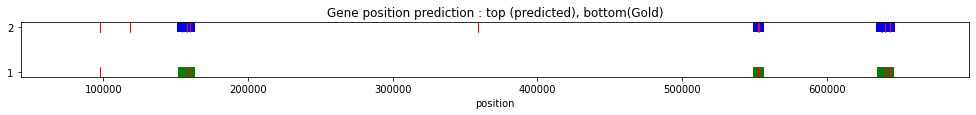

In [109]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
fig.set_figwidth(17)
fig.set_figheight(1)
for s,e in df[['start','end']].values:
    ax.plot([s,e],[2,2], linewidth=10,  color = 'blue', marker='|', markeredgecolor='red', markersize=10)
#     ax.scatter([s,e],[2,2], linewidth=40)
for s,e in genepos:
    if s < 650000 and e-s > 100:
        ax.plot([s,e],[1,1], linewidth=10, marker='|', color = 'green', markeredgecolor='red', markersize=10)
#         ax.scatter([s,e],[1,1], linewidth=40)
ax.set_title('Gene position prediction : top (predicted), bottom(Gold)')
ax.set_xlabel('position')
# ax.set_xticklabels(['GOld','Pred'])
ax.margins(0.1) 
plt.show()